Business Intelligence Challenge: Strategic Analysis of Superstore Performance
Objective: This exercise is a case study in practical data analysis. You will act as a data analyst for a national retail company, tasked with analyzing the US Superstore dataset. Your goal is to move beyond descriptive plotting to produce diagnostic insights and formulate data-driven recommendations that can inform business strategy.
Key Competencies:
Strategic Inquiry: Translate broad business objectives into specific, testable questions.
Data Storytelling: Develop a clear and compelling narrative supported by visualizations.
Tool Proficiency: Differentiate between exploratory and explanatory analysis, selecting the right tool (Matplotlib for deep dives, Seaborn for clear communication).
Actionable Insights: Formulate concrete recommendations based on your analytical findings.
Project Brief
Phase 1: Data Scoping and Preparation
A reliable analysis is built on a foundation of clean, well-understood data.
Data Ingestion and Initial Assessment:
Download and load the US Superstore dataset.
Perform an initial data review using .info(), .describe(), and .isnull().sum().
Guiding Questions: What is the data type of the date columns? What is the time frame of this dataset? Are there significant gaps in the data that could compromise the analysis?
Data Cleaning and Preprocessing:
Address any missing values or duplicates. In your documentation, you must justify your methodology. Explain why you chose to drop, fill, or otherwise impute data for each specific case.
Ensure data types are correct, particularly converting date columns to datetime objects for time-series analysis.
Feature Engineering:
To enable deeper analysis, create new features from the existing data. At a minimum, create:
Profit Margin calculated as (Profit / Sales) * 100.
Order Year and Order Month extracted from the primary date column.

In [ ]:
#libraries imports
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns

#Download and load the US Superstore dataset.
df = pd.read_excel('US Superstore data.xls', header = 0, index_col = 'Row ID')

#Perform an initial data review using .info(), .describe(), and .isnull().sum().
print(df.head())
print(df.describe()) # What is the time frame of this dataset? --> from 2014-01-03 to 2018-01-05
print(df.info())  # What is the data type of the date columns? --> datetime64
print(df.isnull().sum())  # Are there significant gaps in the data that could compromise the analysis? --> No, there are no significant gaps in the data ; all columns contain complete data (no null values)

#Data Cleaning and Preprocessing:
#Address any missing values or duplicates. In your documentation, you must justify your methodology. Explain why you chose to drop, fill, or otherwise impute data for each specific case.
print(df[df.duplicated() == True])
df.drop_duplicates() # Duplicated records have been identified and removed, ensuring data consistency for analysis.

#Ensure data types are correct, particularly converting date columns to datetime objects for time-series analysis.
#Data-types seem coherent. However, we need to keep in mind not to treat 'Postal Code' as quantitative data.

#To enable deeper analysis, create new features from the existing data. At a minimum, create:
#Profit Margin calculated as (Profit / Sales) * 100.
df['Profit Margin'] = df['Profit']/df['Sales'] *100
print(df[['Sales', 'Profit', 'Profit Margin']].describe())
#Order Year and Order Month extracted from the primary date column.
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
print(df.head())



              Order ID Order Date  Ship Date       Ship Mode Customer ID  \
Row ID                                                                     
1       CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
3       CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
4       US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
5       US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

          Customer Name    Segment        Country             City  \
Row ID                                                               
1           Claire Gute   Consumer  United States        Henderson   
2           Claire Gute   Consumer  United States        Henderson   
3       Darrin Van Huff  Corporate  United States      Los Angeles   
4        Sean O'Donnell   Consumer  United States  Fort Lauderdale   
5        Sean O'Donnell   Consumer  United Stat

Phase 2: Exploratory Analysis with Matplotlib
In this phase, you use Matplotlib for its control and flexibility to conduct a deep, interactive exploration of the data.
Time-Series Trend Investigation:
Create a line chart of total Sales aggregated by month across all years.
Technical Requirement: Enhance this chart with interactivity. Using a library like ipywidgets, add a dropdown filter for Product Category. This will allow for dynamic comparison of sales trends between categories.
Analytical Focus: Document your findings. Identify any evidence of seasonality, long-term growth or decline, and significant differences in trends between product categories.
Geographic Performance Analysis:
Visualize total sales by State. A sorted bar chart is a good starting point.
Technical Requirement: Create an interactive control, such as a slider, to dynamically display the "Top N" performing states. This simulates a common dashboard feature for filtering and ranking.
Analytical Focus: Identify the top revenue-generating states. Are sales concentrated in a few key markets, or are they widely distributed? Note any states that appear to be underperforming relative to their population or region.

In [27]:
#Time-Series Trend Investigation:
#Technical Requirement: Enhance this chart with interactivity. Using a library like ipywidgets, add a dropdown filter for Product Category. This will allow for dynamic comparison of sales trends between categories.
# Add "All" to the list of categories
category_options = ['All'] + sorted(df['Category'].dropna().unique().tolist())

# Dropdown widget with "All" included
category_dropdown = widgets.Dropdown(
    options=category_options,
    description='Category:',
    value='All'
)
# Plotting function
def plot_sales_by_category(category):
    # Filter or use all
    if category == 'All':
        filtered_df = df.copy()
    else:
        filtered_df = df[df['Category'] == category]
    #Create a line chart of total Sales aggregated by month across all years.
    sales_per_year_month = filtered_df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()   # Group by year and month, and sum the sales


    sales_per_year_month['Year-Month'] = sales_per_year_month['Order Year'].astype(str) + '-' + \
                                        sales_per_year_month['Order Month'].astype(str).str.zfill(2) # Create a "Year-Month" string for the x-axis

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(sales_per_year_month['Year-Month'], sales_per_year_month['Sales'])
    plt.xticks(rotation=45)
    plt.title('Total Sales by Month Across All Years')
    plt.xlabel('Year-Month')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()

# Link the dropdown to the function
widgets.interact(plot_sales_by_category, category=category_dropdown)

#Analytical Focus: Document your findings. 
#Identify any evidence of seasonality, long-term growth or decline, and significant differences in trends between product categories.
#I would say we can infer a certain seasonality is sales, with a growth in the second half of each year, especially visible for Furniture and Office Supplies categories
#2017 seems to show the premiscices of a long-term growth, but I would not confirm it for lack of significant data showing such phenomenon
#Technology sale are not as seasonal.


#Geographic Performance Analysis:
#Visualize total sales by State. A sorted bar chart is a good starting point.
#Technical Requirement: Create an interactive control, such as a slider, to dynamically display the "Top N" performing states. This simulates a common dashboard feature for filtering and ranking.
# Sort total sales and group by state
sales_per_state = df.groupby('State')['Sales'].sum().reset_index().sort_values('Sales', ascending=False)

# Interactive function to plot top N states
def plot_top_n_states(n):
    top_n = sales_per_state.head(n)

    plt.figure(figsize=(12, 6))
    plt.barh(top_n['State'], top_n['Sales'], color='skyblue')
    plt.gca().invert_yaxis()  # So the top state appears at the top
    plt.xticks(rotation=45)
    plt.title(f'Top {n} States by Total Sales')
    plt.xlabel('State')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()

# Create a slider from 1 to number of states
slider = widgets.IntSlider(
    value=5,
    min=1,
    max=len(sales_per_state),
    step=1,
    description='Top N States:',
    continuous_update=False
)

# Link the slider to the function
widgets.interact(plot_top_n_states, n=slider)
#Analytical Focus:
# Identify the top revenue-generating states. --> California, New York, Texas, Washington, Pennsylvania
# Are sales concentrated in a few key markets, or are they widely distributed? 
print((df[df['State'] == 'California']['Sales'].sum() + df[df['State'] == 'New York']['Sales'].sum())/df['Sales'].sum() *100)
# --> Top 2 States make for 33% of Total Sales. I deem this dictibution as concentrated.
# Note any states that appear to be underperforming relative to their population or region.


interactive(children=(Dropdown(description='Category:', options=('All', 'Furniture', 'Office Supplies', 'Techn…

interactive(children=(IntSlider(value=5, continuous_update=False, description='Top N States:', max=49, min=1),…

33.45653903331859


Phase 3: Communicating Findings with Seaborn
Now, shift your focus from exploration to communication. Use Seaborn to create polished, presentation-ready visualizations designed to convey clear messages to a business audience.
Product Profitability Report:
Generate a horizontal bar chart displaying the Top 10 Most Profitable Products.
Presentation Requirement: This chart is intended for an executive summary. It must be clear and impactful. Use a descriptive title, label axes correctly, and annotate each bar with its corresponding profit value to eliminate ambiguity.
Discount Strategy Analysis:
Create a scatter plot to examine the relationship between Discount and Profit.
Analytical Requirement: A simple scatter plot is insufficient. Use the hue parameter to color the data points by Product Category. This will reveal whether the impact of discounting is uniform across the business. Consider adding a regression line (regplot) to clarify the trend.
Analytical Focus: What is the relationship between discounts and profitability? Does this relationship vary by category? Identify the point at which discounts begin to consistently result in losses. This analysis is critical for providing actionable advice.


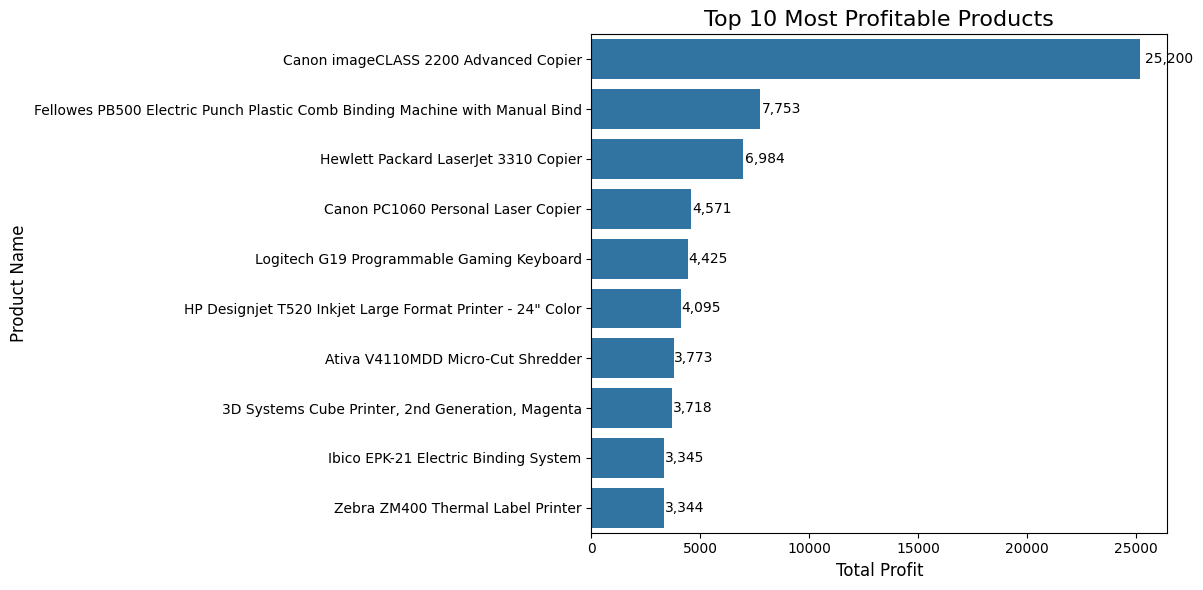

<Figure size 1200x800 with 0 Axes>

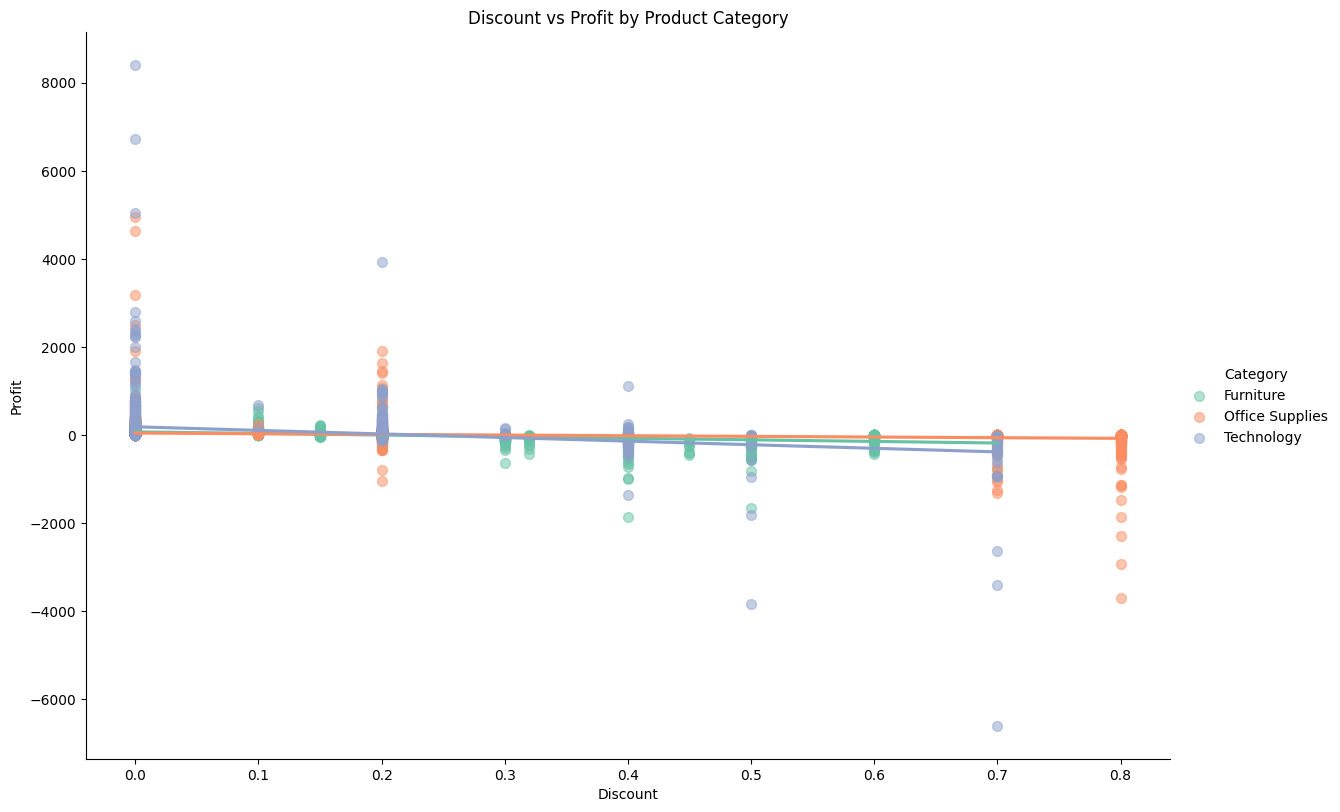

In [32]:
#Product Profitability Report:
#Generate a horizontal bar chart displaying the Top 10 Most Profitable Products.
top_ten_profitable_products = df.groupby('Product ID')['Profit'].sum().reset_index().sort_values('Profit', ascending=False).head(10) #Chose 'Profit' because it's an absolute value, therefore summable. Chose 'Product ID' to ensure uniqueness.

#Extract Product Names respective to ProductID and keep only the most frequent.
product_names = (
    df.groupby('Product ID')['Product Name']
    .agg(lambda x: x.mode().iloc[0])  # most frequent name
    .reset_index()
)
top_ten_profitable_products = top_ten_profitable_products.merge(product_names, on='Product ID')

plt.figure(figsize=(12, 6))

# Create horizontal barplot
barplot = sns.barplot(
    x='Profit', 
    y='Product Name', 
    data=top_ten_profitable_products
)

#Presentation Requirement: This chart is intended for an executive summary. It must be clear and impactful.
#Use a descriptive title, label axes correctly, and annotate each bar with its corresponding profit value to eliminate ambiguity.
plt.title('Top 10 Most Profitable Products', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Annotate each bar with profit values
for p in barplot.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    barplot.text(
        width + width*0.01,  # a little offset right of bar
        y,
        f'{width:,.0f}',     # format as int with commas
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

#Discount Strategy Analysis:
#Create a scatter plot to examine the relationship between Discount and Profit.
#Analytical Requirement: A simple scatter plot is insufficient. 
#Use the hue parameter to color the data points by Product Category. 
#This will reveal whether the impact of discounting is uniform across the business. Consider adding a regression line (regplot) to clarify the trend.

plt.figure(figsize=(12, 8))

# Add regression lines per category
sns.lmplot(
    data=df,
    x='Discount',
    y='Profit',
    hue='Category',
    palette='Set2',
    height=8,
    aspect=1.5,
    markers='o',
    scatter_kws={'alpha':0.5, 's':50},
    ci=None
)

plt.title('Discount vs Profit by Product Category')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.show()



Phase 4: Methodology and Tooling Review
A key skill for a senior analyst is understanding the strengths and weaknesses of their tools.
Comparative Evaluation: In a markdown cell, provide a concise comparison of Matplotlib and Seaborn based on this project. Address the following:
Efficiency: How quickly could you create a functional vs. a presentation-quality visual in each?
Control vs. Convention: Where did Matplotlib's granular control prove essential? Where did Seaborn's high-level API accelerate your work?
Tool Selection Criteria: Based on your experience, document a clear policy for your future work. For example: "For initial, multi-faceted data exploration, I will primarily use [Library] because... For final reporting to non-technical stakeholders, I will prefer [Library] because..."

Phase 5: Final Deliverable
Your final output is a Jupyter Notebook that serves as a complete report of your analysis.
Professional Structure: Organize your notebook with clear headings, markdown explanations for each step, and clean, commented code. The notebook should be easily readable by a colleague.
Executive Summary: At the top of the notebook, provide a concise summary of your key findings and recommendations, written for a management audience. Use 3-5 bullet points to highlight the most critical insights.
Example Finding: "Analysis reveals a strong negative correlation between discount rates above 20% and profitability, particularly within the 'Furniture' category, which becomes consistently unprofitable at these discount levels."
Example Recommendation: "Recommend capping the standard discount for all furniture items at 20% and implementing a formal review process for any exceptions."
Optional Advanced Challenges
Integrated Dashboard: Use ipywidgets or Voilà to combine two or more of your charts into a single interactive dashboard view. For example, selecting a state could update a chart showing the product category breakdown for that state.
Outlier Annotation: On your Discount vs. Profit scatter plot, programmatically identify and annotate the top 3 most profitable and top 3 least profitable transactions. What products were they, and what were the circumstances?
Alternative Tooling: Re-create one of the interactive charts using Plotly Express. Briefly comment on its advantages and disadvantages compared to the Matplotlib/ipywidgets combination.